# Transfer with Densenet-161

A lower batch size was used due to GPU memory constraints.

In [1]:
import torchvision.models as models
from torchvision.datasets import CIFAR10, CIFAR100, MNIST, FashionMNIST
from utils import run_and_plot, SVHNWrapper, CAMELYON


def densenet161(fine_tune, nb_classes):

    # initialise network
    net = models.densenet161(pretrained=True)

    if not fine_tune:  # freeze feature extraction layers
        for param in net.parameters():
            param.requires_grad = False

    net.classifier = nn.Linear(2208, nb_classes)
    return net

## CIFAR10

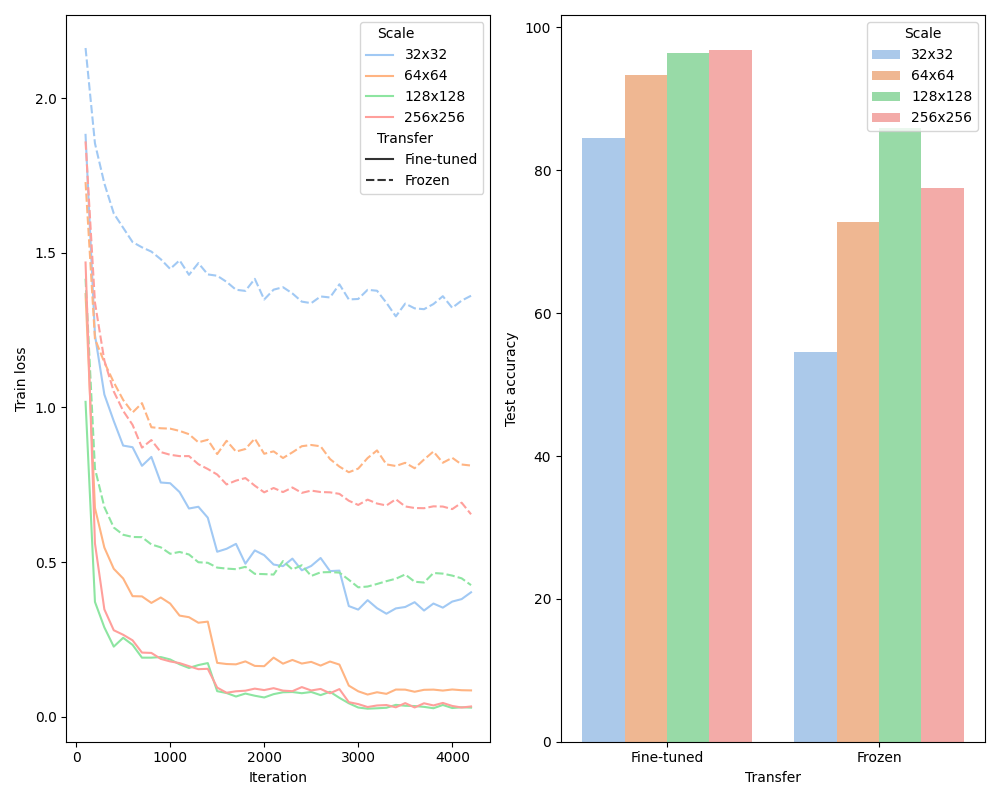

In [2]:
run_and_plot(densenet161, CIFAR10, 32, [1, 2, 4, 8], nb_epochs=10, nb_batch=32)

## CIFAR100

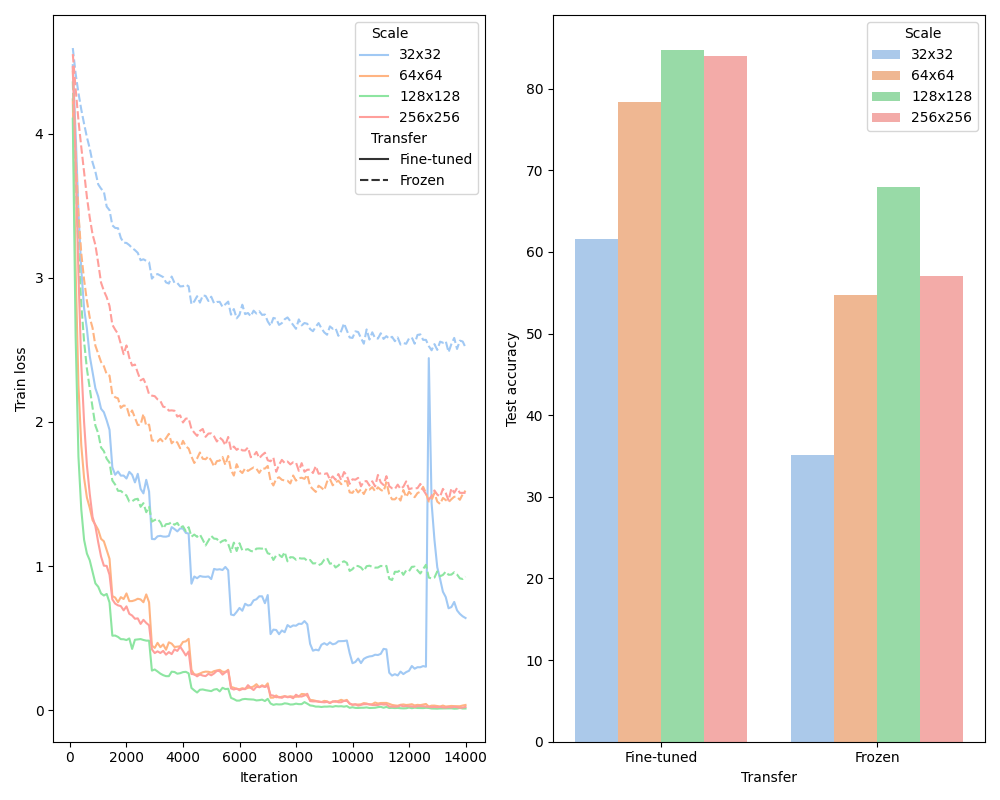

In [3]:
run_and_plot(densenet161, CIFAR100, 32, [1, 2, 4, 8], nb_epochs=3, nb_batch=32)

## MNIST

Note input size of $28\times28$ too small for Densenet.

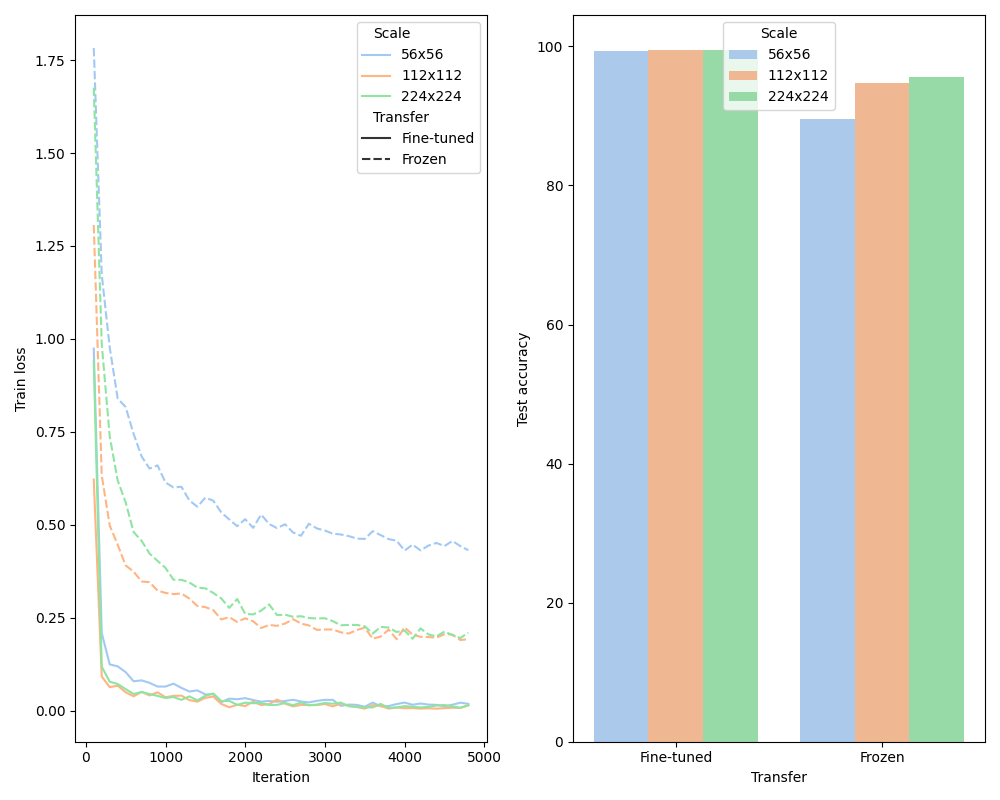

In [4]:
run_and_plot(densenet161, MNIST, 28, [2, 4, 8], nb_epochs=10, nb_batch=32)

## Fashion-MNIST

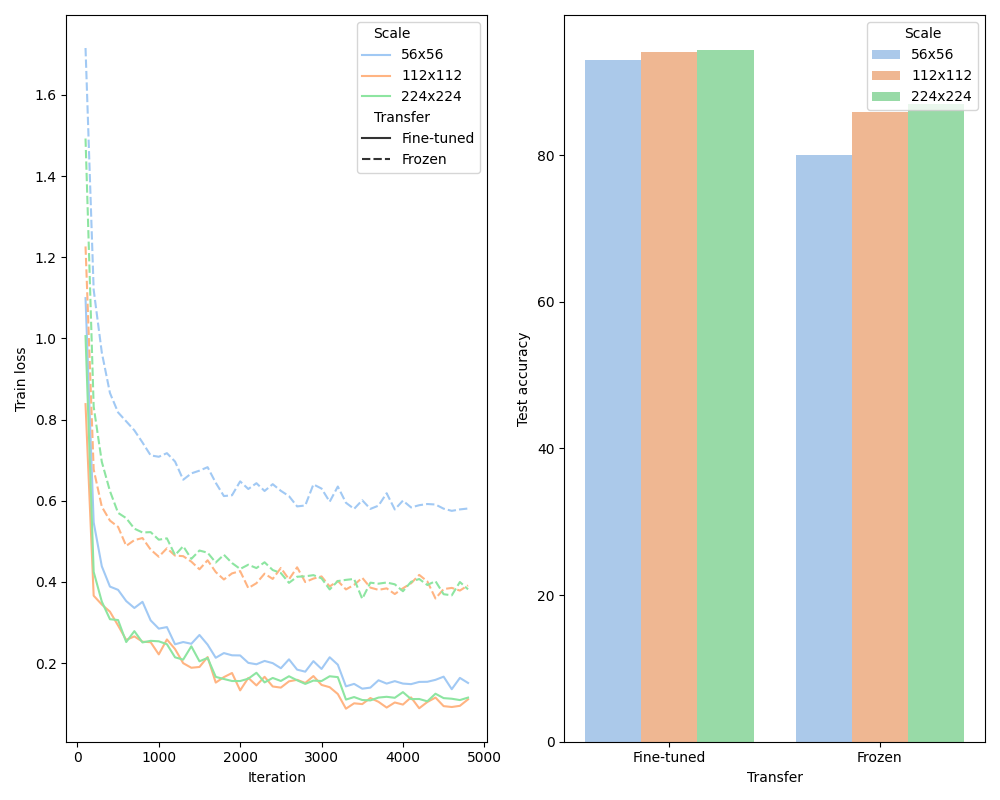

In [5]:
run_and_plot(densenet161, FashionMNIST, 28, [2, 4, 8], nb_epochs=10, nb_batch=32)

## SVHN

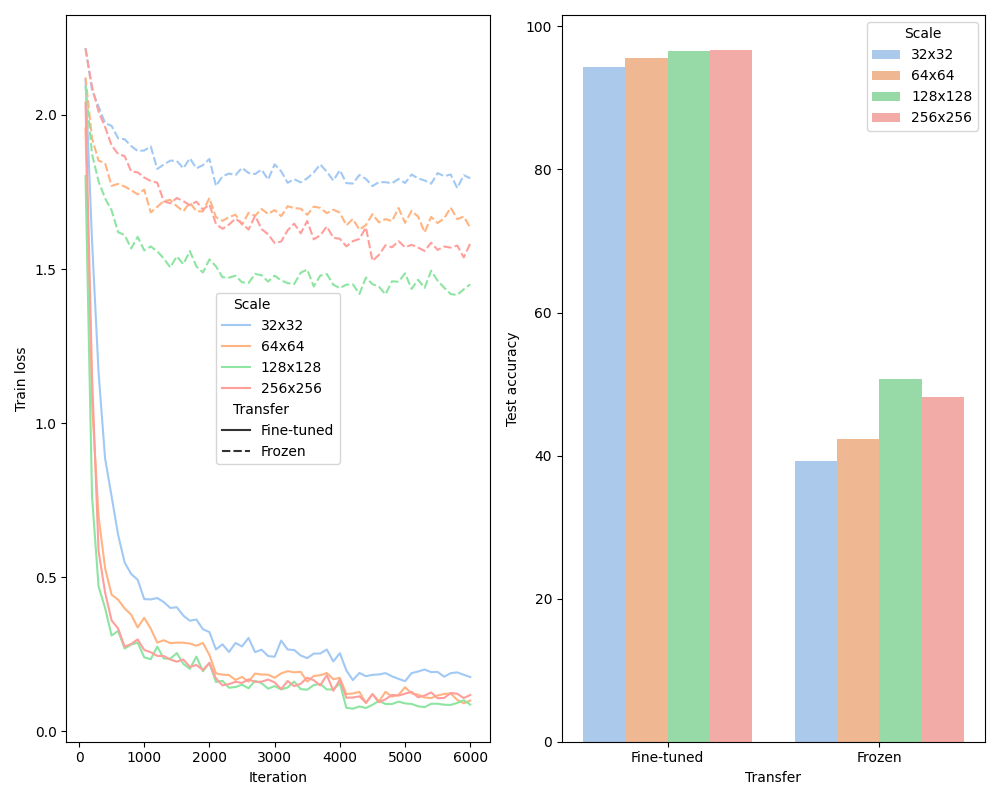

In [6]:
run_and_plot(densenet161, SVHNWrapper, 32, [1, 2, 4, 8], nb_epochs=10, nb_batch=32)

## PatchCAM

https://zenodo.org/record/2546921

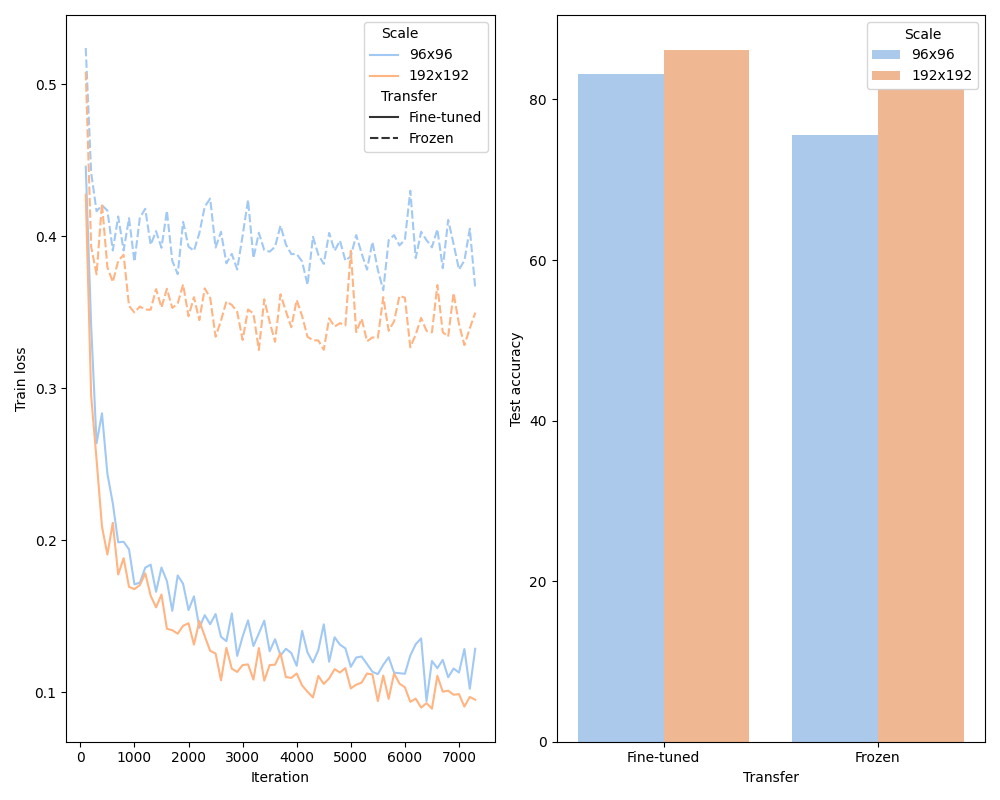

In [7]:
run_and_plot(densenet161, CAMELYON, 96, [1, 2], nb_epochs=1, nb_batch=32 weight_decay=1e-2)